# Preliminaries:

In [ ]:
import numpy as np                                                              # Including essential libraries.  
import pandas as pd                                                             
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split                            # For creating train-test sets.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')                                                   #Mounting the drive.

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/housing.csv')         # opening the csv to work with.

df = df.dropna()
df = df.reset_index(drop=True)

rows = df.shape[0]                                                              # stores the number of rows
cols = df.shape[1]                                                              # stores the number of columns 

print("There are "+ str(rows)+ " rows and "+ str(cols)+ " columns.")

X = df.iloc[:, [2,3,5,6,7,8]]
y = df.iloc[:, 4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
display(df)

There are 20433 rows and 10 columns.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
display(X_train)

,housing_median_age,total_rooms,population,households,median_income,median_house_value
4866,36.0,1033.0,1112.0,229.0,1.7237,105800.0
3759,6.0,6526.0,3298.0,1790.0,2.7231,250000.0
4582,26.0,5062.0,4533.0,1822.0,2.3105,166700.0
35,49.0,1215.0,570.0,264.0,1.4861,97200.0
13198,41.0,1171.0,1479.0,334.0,2.2500,90500.0
...,...,...,...,...,...,...
13123,4.0,4323.0,1479.0,663.0,6.0758,226800.0
19648,17.0,877.0,966.0,218.0,2.0000,52500.0
9845,23.0,2840.0,1586.0,466.0,4.0337,130400.0
10799,9.0,525.0,1257.0,165.0,3.3750,165300.0


# INTRODUCTION:

We have observed that Multiple Linear Regression is one of the key algorithms used in predicting continuous valued data when given more than one numerical feature for the same. This algorithm is nonetheless based on a few assumptions which pave our way into metrically analysis this algorithm for error functions such as MSE.

In clustering problems we have observed that K-means and K-nearest neighbours classification are 2 of the algorithms that perform very well. However under certain assumptions(stated in the report), we can exted this to an algorithm called KNN regression.

The paper chosen works on the principle of merging these two algorithms together. The K-NN properties help the queried data entry localize to its nearest neighbouring entries. The MLR weights help the predict these K neighbours in a better fashion even without normalization.

# REASON FOR THE CHOSEN DATASET:
The target prediction variable chosen is 'total_number of bedrooms' in a housing dataset. Now predicting such a quantity seems to be futile however it was chosen as it had a good degree of correlation with multiple parameter so that the prediction capabilities of this algorithm could be demonstrated while keeping the underlying assumptions intact.

# Multiple Linear Regression

In [ ]:
#Now let us see if our feature space is indeed directionally correlated with the prediction variable.
print(df.corr()['total_bedrooms'])

### OBSERVATION: Some of the best features to perform regression on this data are (population, households, total_rooms)
### We shall start with a basic multiple regression model incorporating features as:
'''
total_rooms
population
households
'''

longitude             0.069608
latitude             -0.066983
housing_median_age   -0.320451
total_rooms           0.930380
total_bedrooms        1.000000
population            0.877747
households            0.979728
median_income        -0.007723
median_house_value    0.049686
Name: total_bedrooms, dtype: float64


<ipython-input-11-e4b4d07434ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['total_bedrooms'])


'\ntotal_rooms\npopulation\nhouseholds\n'

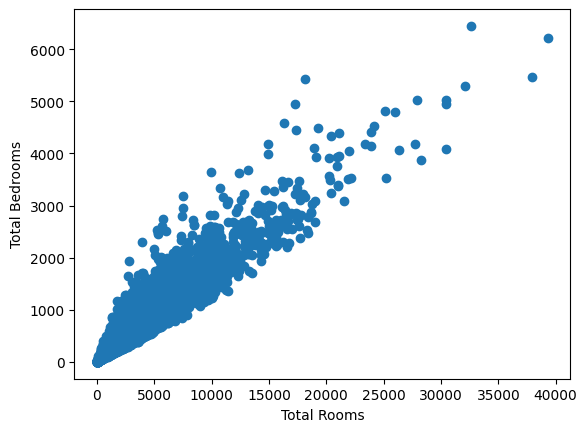

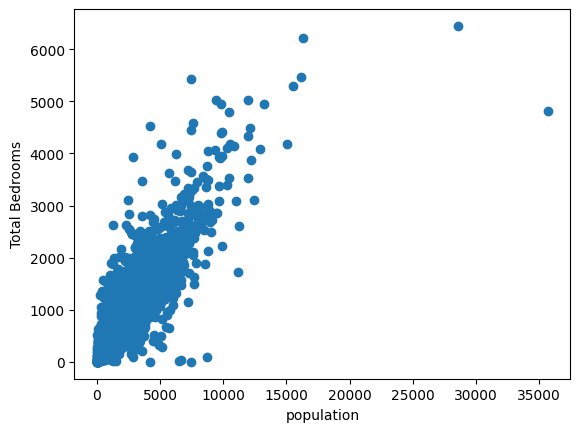

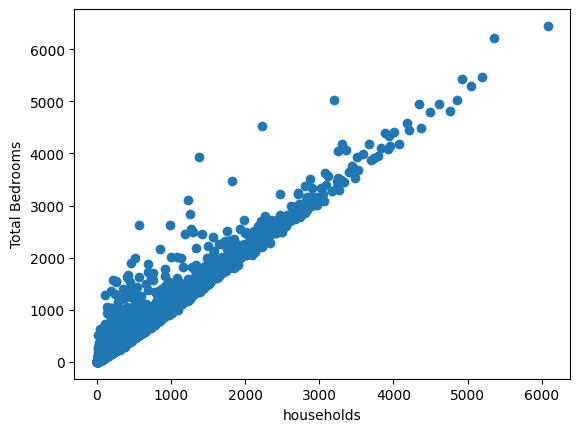

In [ ]:
### Let us observe the distribution of data for better understanding.
plt.scatter(df['total_rooms'], df['total_bedrooms'])
plt.xlabel('Total Rooms')
plt.ylabel('Total Bedrooms')
plt.show()

plt.scatter(df['population'], df['total_bedrooms'])
plt.xlabel('population')
plt.ylabel('Total Bedrooms')
plt.show()

plt.scatter(df['households'], df['total_bedrooms'])
plt.xlabel('households')
plt.ylabel('Total Bedrooms')
plt.show()

### OBSERVATIONS:
#   We observe the correlation between the data as it linearly aligns itself along the y=x axis.

In [ ]:
# First convert the data_frames to numpy arrays(matrices are easier to deal with :) ). 
X_MLR = np.array(df.iloc[:, [3, 5, 6]])                                         # 20433 x 3
y_MLR = np.array(df.iloc[:, 4])                                                 # 20433 x 1(Single Dimension)

X_MLR = np.hstack((np.ones((20433,1)), X_MLR))                                  # 20433 x 4 padded with ones to train parameter alpha.
print(X_MLR.shape)    

(20433, 4)


(4,)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,MLR_total_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,146.084845
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1296.421999
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,212.647592
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,243.217404
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,295.473384
...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,355.812014
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,126.126673
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,472.798419
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,385.313358


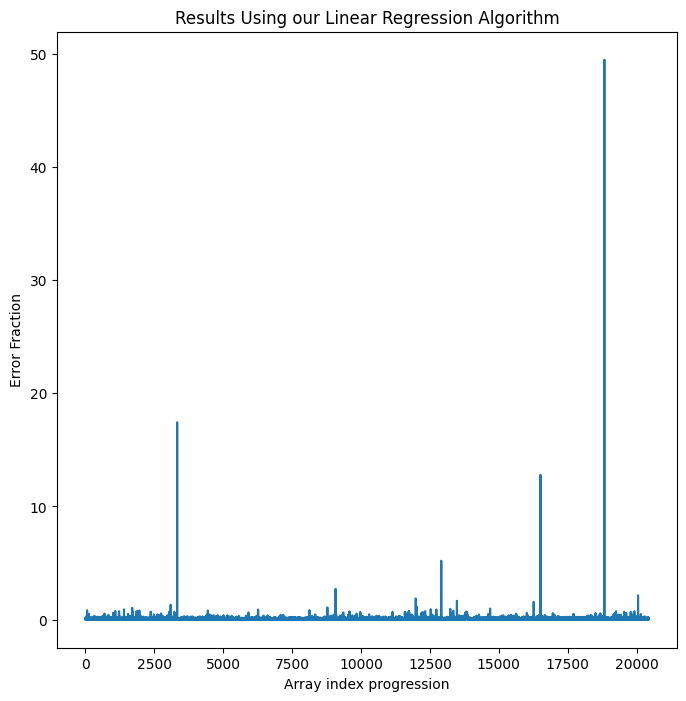

(4,)


In [ ]:
from numpy.linalg import inv
def MLR_param(X_MLR, y_MLR):
  #return (inv((X_MLR.T)@X_MLR)@(X_MLR.T))@y_MLR
  return np.dot(np.dot(inv(np.dot(X_MLR.T, X_MLR)), X_MLR.T), y_MLR)            # Closed form expression for Multile Linear Regression optimization problem

param_pred = np.array(MLR_param(X_MLR, y_MLR))
print(param_pred.shape)
y_pred = np.array(np.dot(X_MLR,param_pred))

df['MLR_total_bedrooms'] = y_pred
display(df)


error_fraction = (np.abs(y_pred-y_MLR))/y_MLR

plt.figure(figsize=(8,8))
plt.plot(range(len(y_MLR)), error_fraction)
plt.title('Results Using our Linear Regression Algorithm')
plt.xlabel("Array index progression")
plt.ylabel("Error Fraction")
plt.show()
### OBSERVATION: See how the error fraction is localized near the zero value in the plot. Let us analyze the results further.
#   High Error fractions indicate outliers in the dataset. 

In [ ]:
### Let us use error metrics like MSE and MAE to observe our performance.
MAE = sum(np.abs(y_pred-y_MLR))/(y_MLR.shape[0])
MSE = sum((y_pred-y_MLR)**2)/(y_MLR.shape[0])

print("Mean Absolute Error:(MAE)", MAE)
print("Mean Squared Error:(MSE)", MSE)
print("Root Mean Squared Error(RMSE):", np.sqrt(MSE))

Mean Absolute Error:(MAE) 40.54386040268758
Mean Squared Error:(MSE) 5847.394291693091
Root Mean Squared Error(RMSE): 76.46825675856022


Comparision against the MLR function present in the sklearn Library:

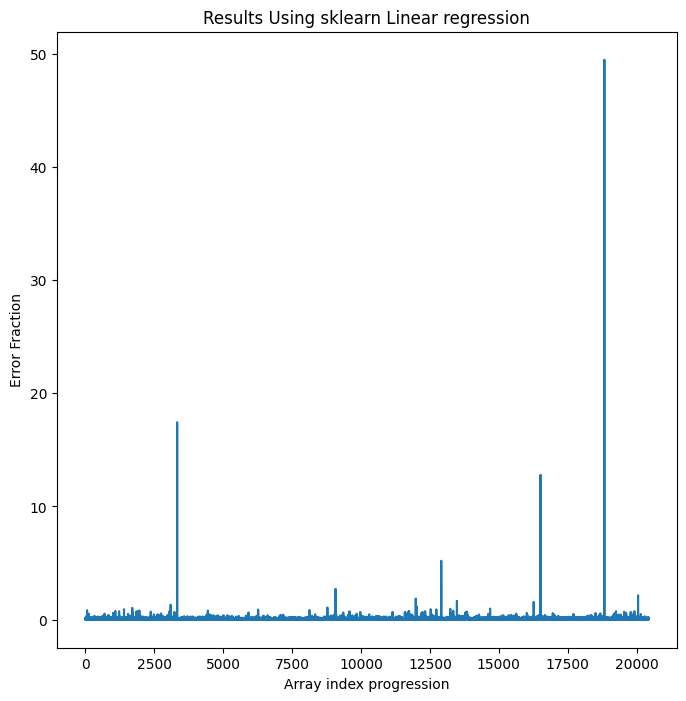

(40.5438604026879, 5847.394291693084)

In [ ]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression().fit(X_MLR, y_MLR)
sklearn_y_predictions = sklearn_model.predict(X_MLR)
#print(sklearn_y_predictions)
error_fraction = (np.abs(sklearn_y_predictions-y_MLR))/y_MLR

plt.figure(figsize=(8,8))
plt.title('Results Using sklearn Linear regression')
plt.plot(range(len(y_MLR)), error_fraction)
plt.xlabel("Array index progression")
plt.ylabel("Error Fraction")
plt.show()

### Using Sklearn difined metrics.
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(sklearn_y_predictions, y_MLR), mean_squared_error(sklearn_y_predictions, y_MLR)

### INFERENCE: We get the exact same metrics as expected.

# K-Nearest Neighbours

K-NN Algorithm:

1. Find the euclidean distance between the all training features and test sample features.
2. Set a fixed number of neighbours with the least euclidean distance.
3. The prediction value is the average of the target values of these K-neighbour test samples we used.
4. Finally find the performance of this algorithm using MSE(Mean-Squared Error) and R2 Score as a standard metric.

In [ ]:
### Method of choosing our Feature Space:
#   1. We choose direction correlated features with respect to the target variable.
#`  2. We wish to have a distance based algorithm, hence normalization is an essential part in this algorithm.
#   3. We can use 2 strategies: the first being |xi - xtarget|/|xi - xavg| or another strategy could be |xi - xtarget|/|xmax - xmin|

maxi = np.array([df['total_rooms'].max(), df['population'].max(), df['households'].max()])
mini = np.array([df['total_rooms'].min(), df['population'].min(), df['households'].min()])
avg = np.array([df['total_rooms'].sum()/df.shape[0], df['population'].sum()/df.shape[0], df['households'].sum()/df.shape[0]])
abs_diff = np.abs(maxi-mini)

print(maxi)
print(avg)
print(mini)
print(abs_diff)

[39320. 35682.  6082.]
[2636.50423335 1424.94694856  499.43346547]
[2. 3. 1.]
[39318. 35679.  6081.]


In [ ]:
### Forming Datasets For K-NN Regression:
#   For this algorithm we required dedicated training and testing sets.

X_test_array = np.array(X_test.iloc[:, [1,2,3]])                                # 5109 x 3
X_train_array = np.array(X_train.iloc[:, [1,2,3]])                              # 15324 x 3
y_train_array = np.array(y_train)                                               # 15324 X 1(single Dimnesion)
y_test_array = np.array(y_test)                                                 # 5109 X 1(single Dimnesion)
#print(y_train_array.shape)

KNN Using Average Value Normalization:

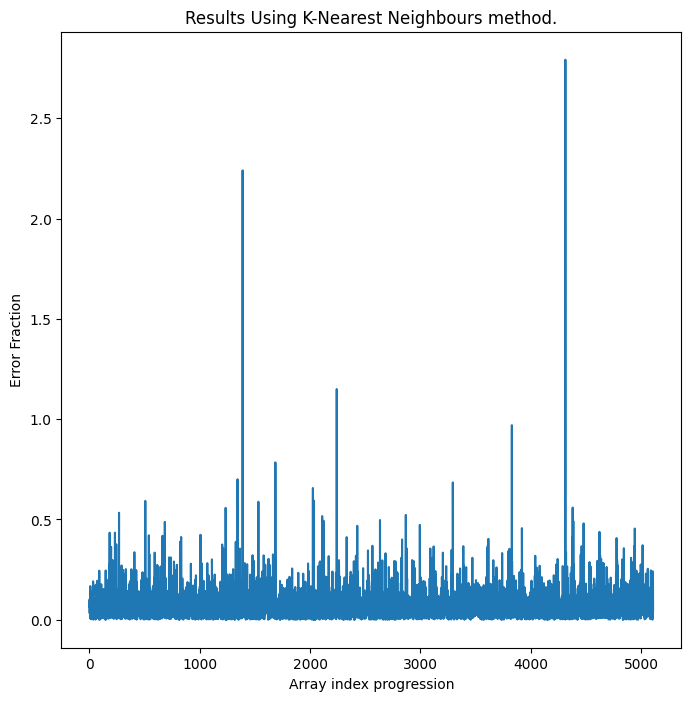

In [ ]:
K = 5                                                                         # Number of neighbours we shall consider.
# But there is a small cavier here. Quantities such as number of bedrooms and population are not directly normalized. How to normalize them?
# First we shall normlize them by their avg.

def euc_dist(training_features, query_features, bias_array):
  return np.sqrt(np.sum(np.square((query_features-training_features)/bias_array)))

y_KNN = np.zeros(y_test_array.shape[0])
#take a test point
for i in range(X_test_array.shape[0]):
  # find  K-nearest neighbours here and the avg of their total bedrooms.
  dist = np.zeros(X_train_array.shape[0])
  for j in range(X_train_array.shape[0]):
    dist[j] = euc_dist(X_test_array[i], X_train_array[j], avg)
  indices = np.argsort(dist)                                                    # Sorts the indices of the distances in the ascending order.
  y_KNN[i] = np.mean(y_train_array[indices[0:K]])

### Let us see the performance.
error_fraction = (np.abs(y_KNN-y_test_array))/y_test_array

plt.figure(figsize=(8,8))
plt.plot(range(len(y_KNN)), error_fraction)
plt.title('Results Using K-Nearest Neighbours method')
plt.xlabel("Array index progression")
plt.ylabel("Error Fraction")
plt.show()

### Execution Time: 13 mins and 47 seconds 

In [ ]:
### OBSERVING ERROR METRICS:
MAE = sum(np.abs(y_KNN-y_test_array))/(y_test_array.shape[0])
MSE = sum((y_KNN-y_test_array)**2)/(y_test_array.shape[0])

print("Mean Absolute Error:(MAE)", MAE)
print("Mean Squared Error:(MSE)", MSE)
print("Root Mean Squared Error(RMSE):", np.sqrt(MSE))

### OBSERVATION: These error metrics seem to be better than the linear regression too. Lets try for an R2-score.

def calculate_r2(actual_target_values, predicted_target_values):
    sum_squared_residuals = np.sum(np.square(predicted_target_values - actual_target_values))
    sum_squares = np.sum(np.square(np.mean(actual_target_values) - actual_target_values))
    r2 = 1 - (sum_squared_residuals/sum_squares)
    return r2
  
print("R2 Score:", calculate_r2(y_test_array, y_KNN))

### All the error metrics for the algorithm seem to be alright.

Mean Absolute Error:(MAE) 33.03221765511838
Mean Squared Error:(MSE) 3398.5704756312393
Root Mean Squared Error(RMSE): 58.29725958937726
R2 Score: 0.9809791599328818


In [ ]:
## Trying to append the dataset.
y_test_df = pd.DataFrame(y_test)
y_test_df['KNN_prediction_avg'] = y_KNN
y_test_df['error_fraction_KNN_avg'] = error_fraction
display(y_test_df)

,total_bedrooms,KNN_prediction_avg,error_fraction_KNN_avg
14050,418.0,391.2,0.064115
6060,684.0,753.2,0.101170
13962,726.0,749.8,0.032782
14222,202.0,214.8,0.063366
17832,481.0,519.0,0.079002
...,...,...,...
3567,389.0,328.6,0.155270
5981,237.0,233.4,0.015190
3679,394.0,405.4,0.028934
4262,173.0,139.8,0.191908


KNN Using Maximum-Minimum Normalization:

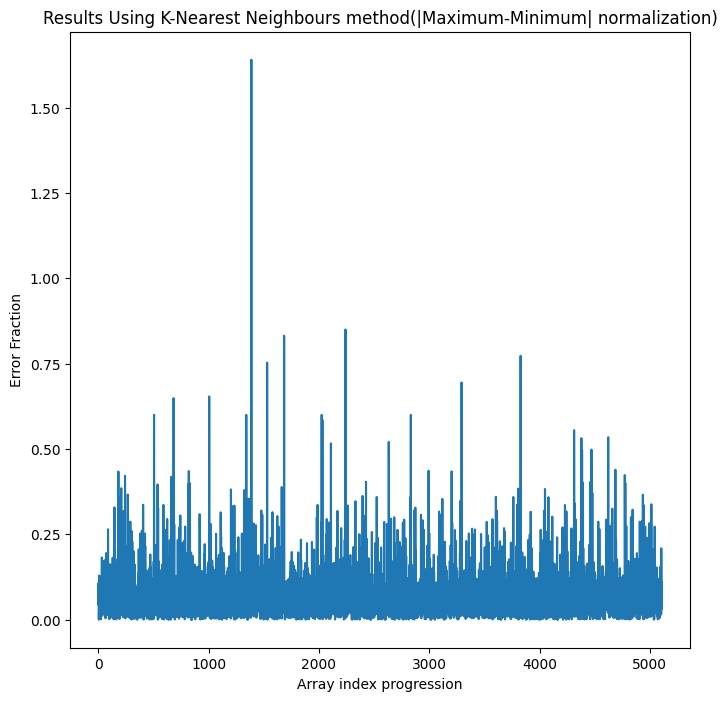

In [ ]:
K = 5                                                                         # Number of neighbours we shall consider.

def euc_dist(training_features, query_features, bias_array):
  return np.sqrt(np.sum(np.square((query_features-training_features)/bias_array)))

y_KNN_2 = np.zeros(y_test_array.shape[0])
#take a test point
for i in range(X_test_array.shape[0]):
  # find  K-nearest neighbours here and the avg of their total bedrooms.
  dist = np.zeros(X_train_array.shape[0])
  for j in range(X_train_array.shape[0]):
    dist[j] = euc_dist(X_test_array[i], X_train_array[j], abs_diff)             # Using |Min-Max| normalization
  indices = np.argsort(dist)                                                    # Sorts the indices of the distances in the ascending order.
  y_KNN_2[i] = np.mean(y_train_array[indices[0:K]])
  #print((y_KNN_2[i]-y_test_array[i])/y_test_array[i])

### Let us see the performance.
error_fraction = (np.abs(y_KNN_2-y_test_array))/y_test_array

plt.figure(figsize=(8,8))
plt.plot(range(len(y_KNN_2)), error_fraction)
plt.title('Results Using K-Nearest Neighbours method(|Maximum-Minimum| normalization)')
plt.xlabel("Array index progression")
plt.ylabel("Error Fraction")
plt.show()

### Execution Time: 13 mins and 20 seconds 

In [ ]:
### OBSERVING ERROR METRICS:
MAE = sum(np.abs(y_KNN_2-y_test_array))/(y_test_array.shape[0])
MSE = sum((y_KNN_2-y_test_array)**2)/(y_test_array.shape[0])

print("Mean Absolute Error:(MAE)", MAE)
print("Mean Squared Error:(MSE)", MSE)
print("Root Mean Squared Error(RMSE):", np.sqrt(MSE))

### OBSERVATION: These error metrics seem to be better than the linear regression too. Lets try for an R2-score.

def calculate_r2(actual_target_values, predicted_target_values):
    sum_squared_residuals = np.sum(np.square(predicted_target_values - actual_target_values))
    sum_squares = np.sum(np.square(np.mean(actual_target_values) - actual_target_values))
    r2 = 1 - (sum_squared_residuals/sum_squares)
    return r2
  
print("R2 Score:", calculate_r2(y_test_array, y_KNN_2))

### All the error metrics for the algorithm seem to be alright.(They are infact almost similiar if not a little better than the initial normalization.)

Mean Absolute Error:(MAE) 32.70205519671168
Mean Squared Error:(MSE) 3330.028436093169
Root Mean Squared Error(RMSE): 57.70639857150305
R2 Score: 0.981362770389477


In [ ]:
## Trying to append the dataset to observe the metrics of this new algorithm.
y_test_df = pd.DataFrame(y_test)
y_test_df['KNN_prediction_avg'] = y_KNN_2
y_test_df['error_fraction_KNN_avg'] = error_fraction
display(y_test_df)

,total_bedrooms,KNN_prediction_avg,error_fraction_KNN_avg
14050,418.0,391.2,0.064115
6060,684.0,756.6,0.106140
13962,726.0,757.8,0.043802
14222,202.0,217.2,0.075248
17832,481.0,519.0,0.079002
...,...,...,...
3567,389.0,334.8,0.139332
5981,237.0,226.2,0.045570
3679,394.0,419.6,0.064975
4262,173.0,153.8,0.110983


# NNRMLR

The NNRMLR Algorithm:

1. Find the euclidean distance between the all training features and test sample features.
2. Bias this distance with the weights found in the Multiple Linear Regression(MLR) in the first part of this notebook.
3. Set a fixed number of neighbours with the least normalized euclidean distance.
4. The prediction value is the average of the target values of these K-neighbour test samples we used.
5. Finally find the performance of this algorithm using MSE(Mean-Squared Error) and R2 Score as a standard metric.

The Vanilla Algorithm:

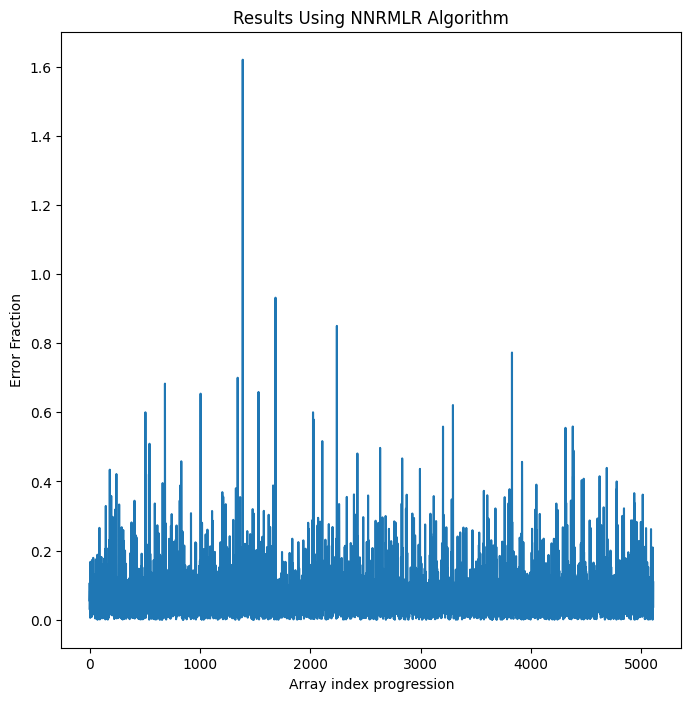

In [ ]:
K = 5                                                                           # Number of neighbours we shall consider.

def euc_dist(training_features, query_features, weights):
  return np.sqrt(np.sum(weights*np.square((query_features-training_features))))

y_NNRMLR = np.zeros(y_test_array.shape[0])
#take a test point
for i in range(X_test_array.shape[0]):
  # find  K-nearest neighbours here and the avg of their total bedrooms.
  dist = np.zeros(X_train_array.shape[0])
  for j in range(X_train_array.shape[0]):
    dist[j] = euc_dist(X_test_array[i], X_train_array[j], np.abs(param_pred[1:]))         # Using |Min-Max| normalization
  indices = np.argsort(dist)                                                              # Sorts the indices of the distances in the ascending order.
  y_NNRMLR[i] = np.mean(y_train_array[indices[0:K]])
  #print((y_NNRMLR[i]-y_test_array[i])/y_test_array[i])

### Let us see the performance.
error_fraction = (np.abs(y_NNRMLR-y_test_array))/y_test_array

plt.figure(figsize=(8,8))
plt.plot(range(len(y_NNRMLR)), error_fraction)
plt.title('Results Using NNRMLR Algorithm')
plt.xlabel("Array index progression")
plt.ylabel("Error Fraction")
plt.show()

### Execution Time: 14 minutes and 56 seconds

In [ ]:
### OBSERVING ERROR METRICS:
MAE = sum(np.abs(y_NNRMLR-y_test_array))/(y_test_array.shape[0])
MSE = sum((y_NNRMLR-y_test_array)**2)/(y_test_array.shape[0])

print("Mean Absolute Error:(MAE)", MAE)
print("Mean Squared Error:(MSE)", MSE)
print("Root Mean Squared Error(RMSE):", np.sqrt(MSE))

### OBSERVATION: These error metrics seem to be better than the linear regression too. Lets try for an R2-score.

def calculate_r2(actual_target_values, predicted_target_values):
    sum_squared_residuals = np.sum(np.square(predicted_target_values - actual_target_values))
    sum_squares = np.sum(np.square(np.mean(actual_target_values) - actual_target_values))
    r2 = 1 - (sum_squared_residuals/sum_squares)
    return r2
  
print("R2 Score:", calculate_r2(y_test_array, y_NNRMLR))

### We observe that the algorithm performs marginally better compared to the KNN algorithm with normalization(Max-Min normalization).

Mean Absolute Error:(MAE) 33.01765511841845
Mean Squared Error:(MSE) 3311.3960461929933
Root Mean Squared Error(RMSE): 57.54473082909497
R2 Score: 0.9814670506187383


In [ ]:
## Trying to append the dataset to observe the metrics of this new algorithm.
y_test_df = pd.DataFrame(y_test)
y_test_df['KNN_prediction_avg'] = y_NNRMLR
y_test_df['error_fraction_KNN_avg'] = error_fraction
display(y_test_df)

,total_bedrooms,KNN_prediction_avg,error_fraction_KNN_avg
14050,418.0,394.6,0.055981
6060,684.0,756.6,0.106140
13962,726.0,747.2,0.029201
14222,202.0,214.8,0.063366
17832,481.0,520.8,0.082744
...,...,...,...
3567,389.0,334.8,0.139332
5981,237.0,231.2,0.024473
3679,394.0,418.0,0.060914
4262,173.0,153.8,0.110983


Now according to the paper we can try to improve results by raising the weight terms found in MLR to different values. Furthermore, we shall try to provide an analytical explaination for the same if the performance significantly improves.

According to the paper a power of [2,3] can be considered optimal for NNRMLR algorithm. let us analyze the situation.

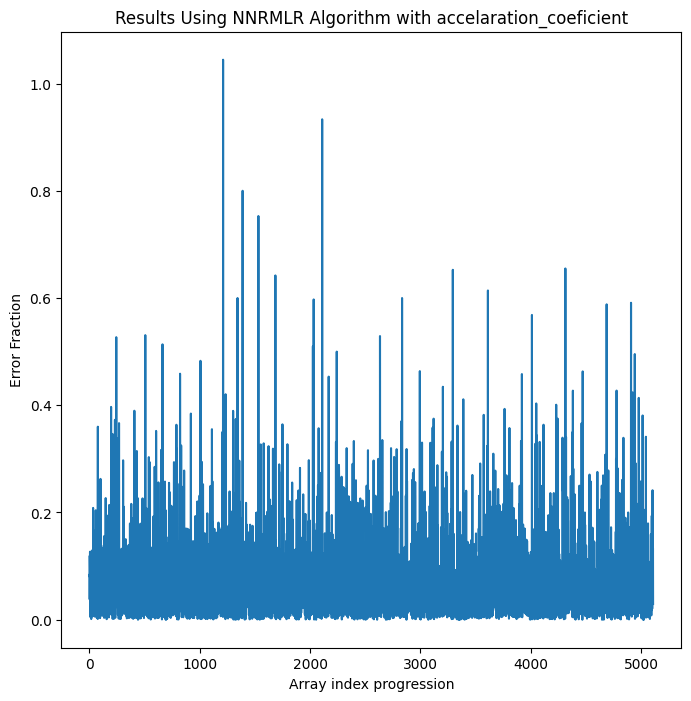

In [ ]:
#Trying results with power(r) of weights = 2.
K = 5                                                                           # Number of neighbours we shall consider.
weights = np.abs(param_pred[1:])**2

def euc_dist(training_features, query_features, weights):
  return np.sqrt(np.sum(weights*np.square((query_features-training_features))))

y_NNRMLR = np.zeros(y_test_array.shape[0])
#take a test point
for i in range(X_test_array.shape[0]):
  # find  K-nearest neighbours here and the avg of their total bedrooms.
  dist = np.zeros(X_train_array.shape[0])
  for j in range(X_train_array.shape[0]):
    dist[j] = euc_dist(X_test_array[i], X_train_array[j], weights)             
  indices = np.argsort(dist)                                                    # Sorts the indices of the distances in the ascending order.
  y_NNRMLR[i] = np.mean(y_train_array[indices[0:K]])
  #print((y_NNRMLR[i]-y_test_array[i])/y_test_array[i])

### Let us see the performance.
error_fraction = (np.abs(y_NNRMLR-y_test_array))/y_test_array

plt.figure(figsize=(8,8))
plt.plot(range(len(y_NNRMLR)), error_fraction)
plt.title('Results Using NNRMLR Algorithm with accelaration_coeficient')
plt.xlabel("Array index progression")
plt.ylabel("Error Fraction")
plt.show()

### Execution Time: 13 minutes and 26 seconds

In [ ]:
### OBSERVING ERROR METRICS:
MAE = sum(np.abs(y_NNRMLR-y_test_array))/(y_test_array.shape[0])
MSE = sum((y_NNRMLR-y_test_array)**2)/(y_test_array.shape[0])

print("Mean Absolute Error:(MAE)", MAE)
print("Mean Squared Error:(MSE)", MSE)
print("Root Mean Squared Error(RMSE):", np.sqrt(MSE))

### OBSERVATION: These error metrics seem to be better than the linear regression too. Lets try for an R2-score.

def calculate_r2(actual_target_values, predicted_target_values):
    sum_squared_residuals = np.sum(np.square(predicted_target_values - actual_target_values))
    sum_squares = np.sum(np.square(np.mean(actual_target_values) - actual_target_values))
    r2 = 1 - (sum_squared_residuals/sum_squares)
    return r2
  
print("R2 Score:", calculate_r2(y_test_array, y_NNRMLR))

### We observe that the algorithm performs a little worse compared to the initial NNRMLR.

Mean Absolute Error:(MAE) 32.97893912703076
Mean Squared Error:(MSE) 4006.9371618712007
Root Mean Squared Error(RMSE): 63.30037252553259
R2 Score: 0.9775743032367782


In [ ]:
## Trying to append the dataset to observe the metrics of this new algorithm with weights
y_test_df = pd.DataFrame(y_test)
y_test_df['KNN_prediction_avg'] = y_NNRMLR
y_test_df['error_fraction_KNN_avg'] = error_fraction
display(y_test_df)

,total_bedrooms,KNN_prediction_avg,error_fraction_KNN_avg
14050,418.0,368.8,0.117703
6060,684.0,749.2,0.095322
13962,726.0,753.6,0.038017
14222,202.0,219.2,0.085149
17832,481.0,519.2,0.079418
...,...,...,...
3567,389.0,350.8,0.098201
5981,237.0,228.8,0.034599
3679,394.0,424.0,0.076142
4262,173.0,150.0,0.132948


NNRMLR with normalization:

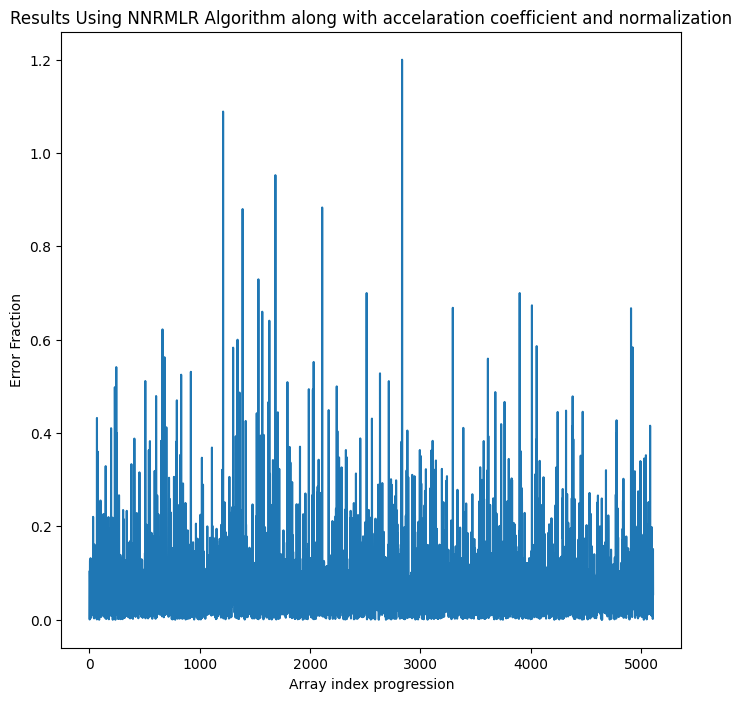

In [ ]:
### Let us try a novel approach now. We shall perform the NNRMLR algorithm but we shall add a normalization along with the existing weights.
#Trying results with power(r) of weights = 2 and adding max_min normalization.

K = 5                                                                           # Number of neighbours we shall consider.
weights = np.abs(param_pred[1:])**2

def euc_dist(training_features, query_features, weights, bias_array):
  return np.sqrt(np.sum(weights*np.square((query_features-training_features)/bias_array)))

y_NNRMLR = np.zeros(y_test_array.shape[0])
#take a test point
for i in range(X_test_array.shape[0]):
  # find  K-nearest neighbours here and the avg of their total bedrooms.
  dist = np.zeros(X_train_array.shape[0])
  for j in range(X_train_array.shape[0]):
    dist[j] = euc_dist(X_test_array[i], X_train_array[j], weights, abs_diff)             
  indices = np.argsort(dist)                                                    # Sorts the indices of the distances in the ascending order.
  y_NNRMLR[i] = np.mean(y_train_array[indices[0:K]])
  #print((y_NNRMLR[i]-y_test_array[i])/y_test_array[i])

### Let us see the performance.
error_fraction = (np.abs(y_NNRMLR-y_test_array))/y_test_array

plt.figure(figsize=(8,8))
plt.plot(range(len(y_NNRMLR)), error_fraction)
plt.title('Results Using NNRMLR Algorithm along with accelaration coefficient and normalization')
plt.xlabel("Array index progression")
plt.ylabel("Error Fraction")
plt.show()

### Execution Time: 18 minutes and 41 seconds

In [ ]:
### OBSERVING ERROR METRICS:
MAE = sum(np.abs(y_NNRMLR-y_test_array))/(y_test_array.shape[0])
MSE = sum((y_NNRMLR-y_test_array)**2)/(y_test_array.shape[0])

print("Mean Absolute Error:(MAE)", MAE)
print("Mean Squared Error:(MSE)", MSE)
print("Root Mean Squared Error(RMSE):", np.sqrt(MSE))

def calculate_r2(actual_target_values, predicted_target_values):
    sum_squared_residuals = np.sum(np.square(predicted_target_values - actual_target_values))
    sum_squares = np.sum(np.square(np.mean(actual_target_values) - actual_target_values))
    r2 = 1 - (sum_squared_residuals/sum_squares)
    return r2
  
print("R2 Score:", calculate_r2(y_test_array, y_NNRMLR))

### OBSERVATION: We observe that the R2 score has gone down despite the additional comptutation. No real gain was seen implementing this modification alteast 
#   on this given dataset. This might prove useful in a case where feature values drastically differ. 
#   Eg. prices of a house are much large than number of rooms, incasee both of them exist in the feature space for some prediction, we may use normalization. 

Mean Absolute Error:(MAE) 34.556194950088084
Mean Squared Error:(MSE) 5562.0226893717045
Root Mean Squared Error(RMSE): 74.57896948451155
R2 Score: 0.9688709282968241


In [ ]:
## Trying to append the dataset to observe the metrics of this new algorithm with weights
y_test_df = pd.DataFrame(y_test)
y_test_df['KNN_prediction_avg'] = y_NNRMLR
y_test_df['error_fraction_KNN_avg'] = error_fraction
display(y_test_df)

,total_bedrooms,KNN_prediction_avg,error_fraction_KNN_avg
14050,418.0,375.0,0.102871
6060,684.0,734.8,0.074269
13962,726.0,726.4,0.000551
14222,202.0,208.6,0.032673
17832,481.0,519.2,0.079418
...,...,...,...
3567,389.0,355.8,0.085347
5981,237.0,237.4,0.001688
3679,394.0,421.8,0.070558
4262,173.0,146.8,0.151445


# CONCLUDING REMARKS:
One of the prominent observations is that localization within the larger dataset has surely helped us. This can be observed using the error metrics calculated for the K-NN normalized prediction algorithm and the MLR algorithm.

The NNRMLR algorithm has surely improved the metrics marginally however this can be extensively studied in further detail over more number of datasets.

Additional efforts can be put in to derive metrics which capture data such as number of mispredictions over a certain error threshold and see a comparative study between 2 variations of this algorithm.

Another approach that could be used is modifying the train-test ratio to reduce overfitting.(This is assumed to have occured as accelarated parameters performed worse than the mere weights).

# References:

H. Hirose, Y. Soejima and K. Hirose, "NNRMLR: A Combined Method of Nearest Neighbor Regression and Multiple Linear Regression," 2012 IIAI International Conference on Advanced Applied Informatics, Fukuoka, Japan, 2012, pp. 351-356, doi: 10.1109/IIAI-AAI.2012.76.

https://ieeexplore.ieee.org/document/6337221

Link to the Report:

https://drive.google.com/file/d/1XONMmJO43WQ3BAFl6VbiZhnmNHt6qp4a/view?usp=share_link

Link to the Video Presentation:

https://drive.google.com/file/d/1bXyRLMmDpTEQOINDCeB5elmm-TSVQCrA/view?usp=share_link

## Other References:

https://www.youtube.com/watch?v=KYNuzfn5Fx0

https://towardsdatascience.com/analytical-solution-of-linear-regression-a0e870b038d5

https://www.youtube.com/watch?v=CBcHCNhrRJc&t=9s